Enter filter type ('average', 'butterworth', or 'median'): average
Enter window size for average filter: 5


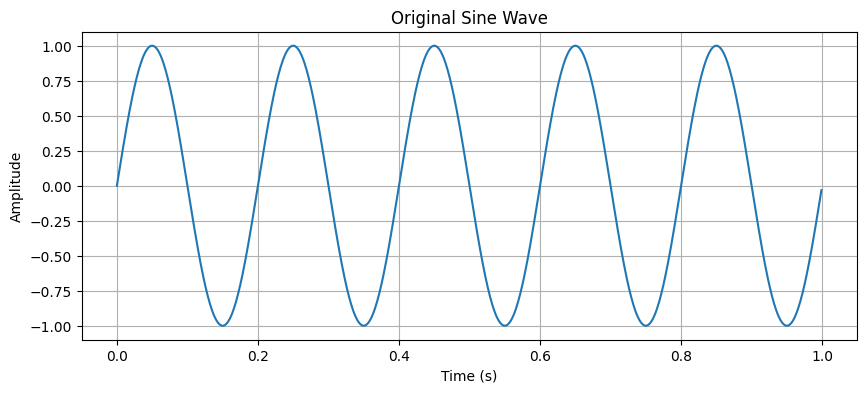

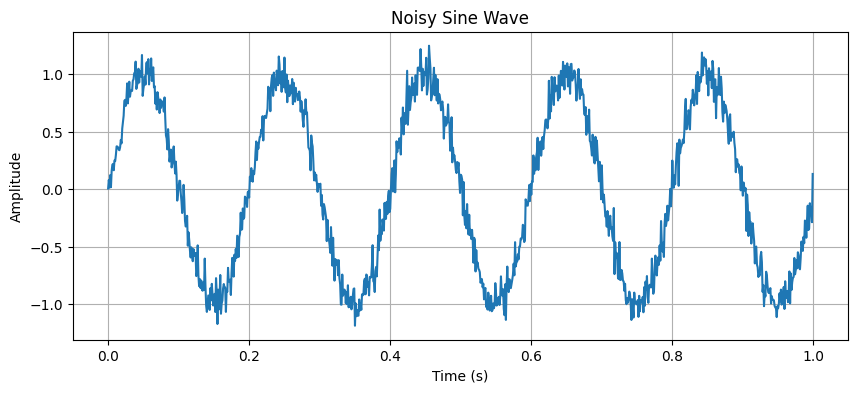

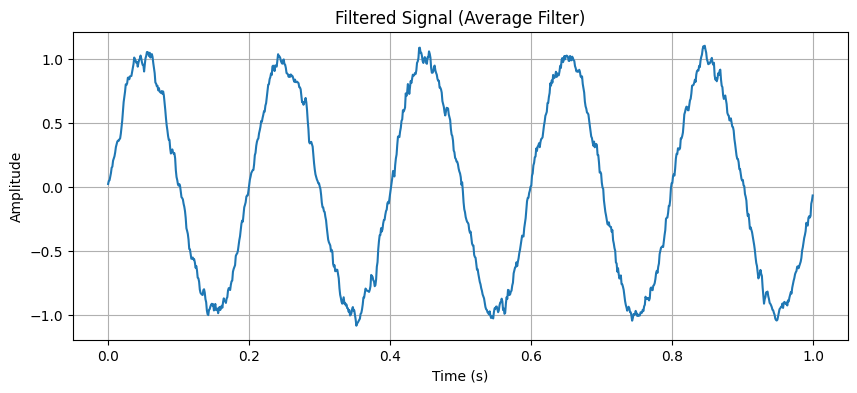

In [2]:
def main():
    # Example values
    freq = 5  # Frequency of the sine wave (Hz)
    amplitude = 1  # Amplitude of the sine wave
    phase = 0  # Phase of the sine wave (in radians)
    sample_rate = 1000  # Sample rate (samples per second)
    duration = 1  # Duration of the signal (seconds)
    noise_level = 0.1  # Standard deviation of noise

    # User input for filter type
    filter_type = input("Enter filter type ('average', 'butterworth', or 'median'): ")

    # Check if the input filter type is valid
    if filter_type not in ['average', 'butterworth', 'median']:
        print("Invalid filter type. Please choose 'average', 'butterworth', or 'median'.")
        return

    # User input for filter parameters
    if filter_type == 'average':
        window_size = int(input("Enter window size for average filter: "))
    elif filter_type == 'butterworth':
        order = int(input("Enter order for Butterworth filter: "))
        cutoff = float(input("Enter cutoff frequency for Butterworth filter: "))
    elif filter_type == 'median':
        kernel_size = int(input("Enter kernel size for median filter: "))

    # Generate sine wave
    t, sine_wave = generate_signal('sine', freq=freq, amplitude=amplitude, phase=phase, sample_rate=sample_rate, duration=duration)

    # Add noise to sine wave
    noisy_signal = add_noise(sine_wave, noise_level)

    # Plot original sine wave
    plot_signal(t, sine_wave, 'Original Sine Wave')

    # Plot noisy sine wave
    plot_signal(t, noisy_signal, 'Noisy Sine Wave')

    # Apply selected filter
    if filter_type == 'average':
        filtered_signal = apply_filter(noisy_signal, 'average', window_size=window_size)
    elif filter_type == 'butterworth':
        filtered_signal = apply_filter(noisy_signal, 'butterworth', order=order, cutoff=cutoff)
    elif filter_type == 'median':
        filtered_signal = apply_filter(noisy_signal, 'median', kernel_size=kernel_size)

    # Plot filtered signal
    plot_signal(t, filtered_signal, f'Filtered Signal ({filter_type.capitalize()} Filter)')

if __name__ == "__main__":
    main()


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


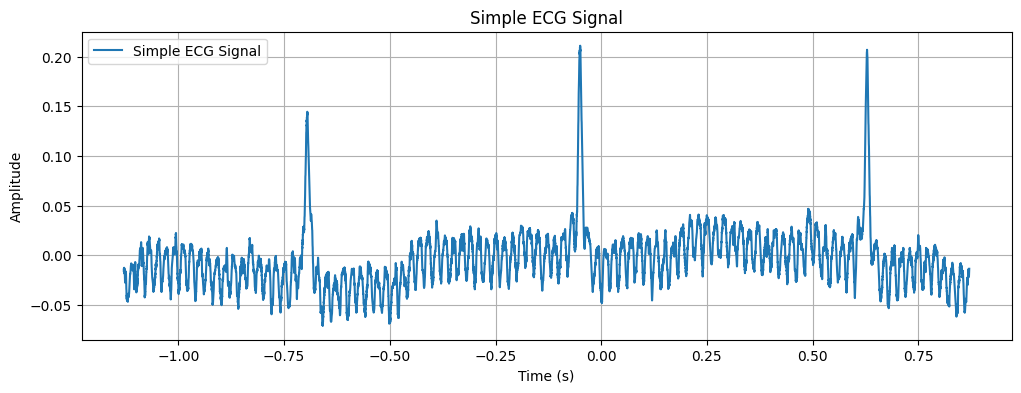

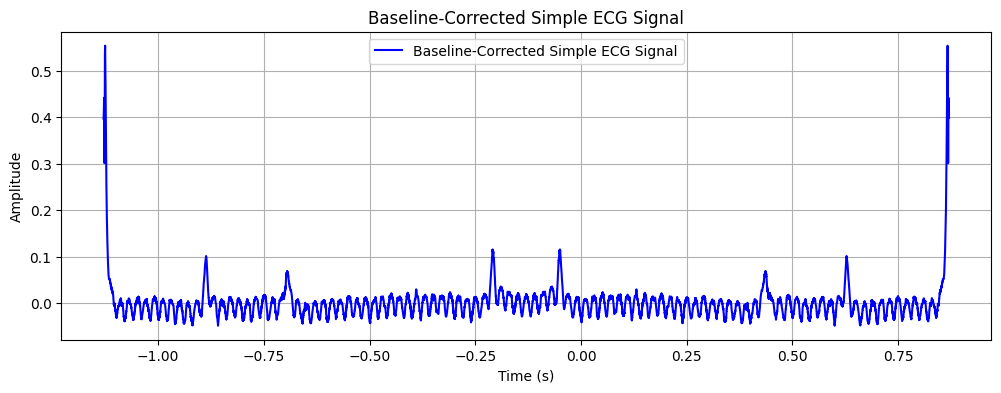

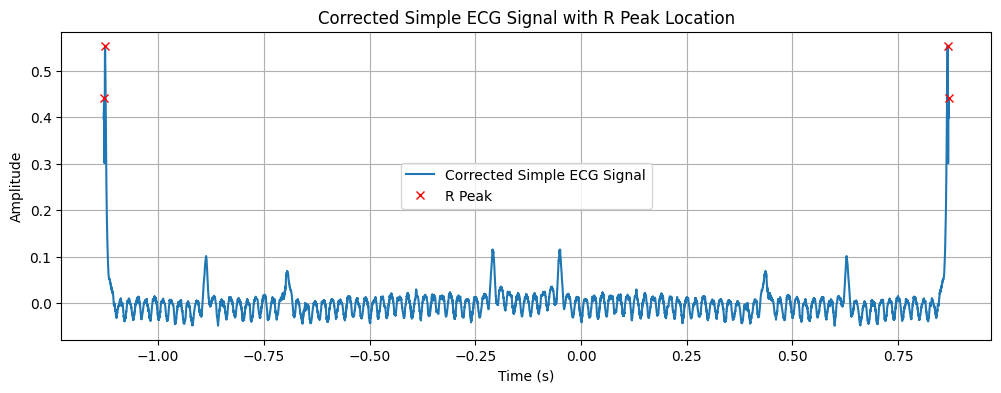

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt
import pandas as pd

# Load the ECG signal (replace 'path_to_ecg_file.csv' with the actual file path)
# ecg_table = pd.read_csv("/home/nalin/Downloads/ecg(1).csv")
ecg_table = pd.read_csv("ecg(1).csv")

# Extract amplitude and time
ecg = ecg_table['Channel 1 (V)']
time = ecg_table['Time (s)']

# Baseline correction function
def baseline_correction(ecg_signal, window_size):
    # Compute the Fourier transform
    fft_signal = np.fft.fft(ecg_signal)

    # Define filter parameters
    Fs = 1 / (time[1] - time[0])  # Sampling frequency
    Fn = Fs / 2  # Nyquist frequency
    Fc = 5  # Cutoff frequency for high-pass filter
    F_normal = Fc / Fn

    # Design a high-pass Butterworth filter
    b, a = butter(N=5, Wn=F_normal, btype='high')

    # Apply the filter to remove baseline drift
    filtered_signal = filtfilt(b, a, fft_signal).real

    # Inverse Fourier transform to obtain the baseline-corrected signal
    corrected_signal = np.fft.ifft(filtered_signal).real
    return corrected_signal

# Apply baseline correction to the simple ECG signal
ecg_corrected_simple = baseline_correction(ecg, window_size=5)


# Plot simple ECG signal
plt.figure(figsize=(12, 4))
plt.plot(time, ecg, label='Simple ECG Signal')
#plt.plot(time, noisy_ecg, label='Noisy ECG Signal', alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Simple ECG Signal')
plt.legend()
plt.grid(True)
plt.show()

# Plot baseline-corrected simple ECG signal
plt.figure(figsize=(12, 4))
plt.plot(time, ecg_corrected_simple, label='Baseline-Corrected Simple ECG Signal', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Baseline-Corrected Simple ECG Signal')
plt.legend()
plt.grid(True)
plt.show()

# Compute and show the location of the R peak in the baseline-corrected signal
peaks_corrected_simple, _ = find_peaks(ecg_corrected_simple, height=0.6 * np.max(ecg_corrected_simple))

plt.figure(figsize=(12, 4))
plt.plot(time, ecg_corrected_simple, label='Corrected Simple ECG Signal')
plt.plot(time[peaks_corrected_simple], ecg_corrected_simple[peaks_corrected_simple], 'x', color='red', label='R Peak')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Corrected Simple ECG Signal with R Peak Location')
plt.legend()
plt.grid(True)
plt.show()


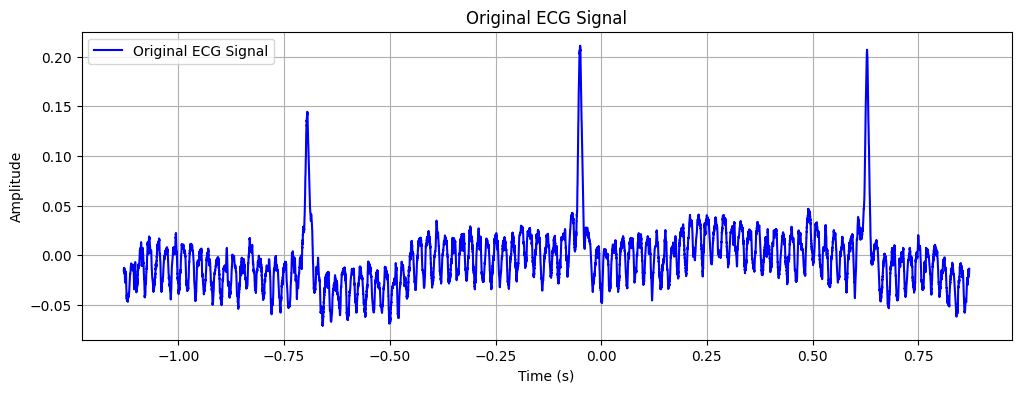

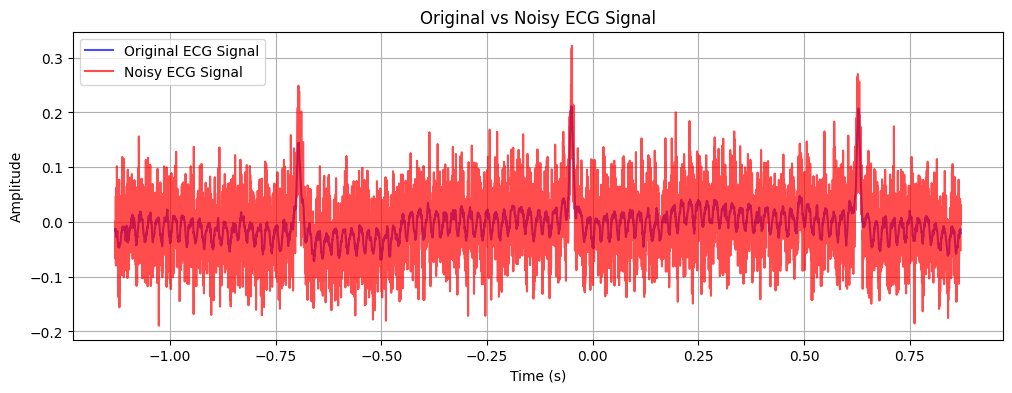

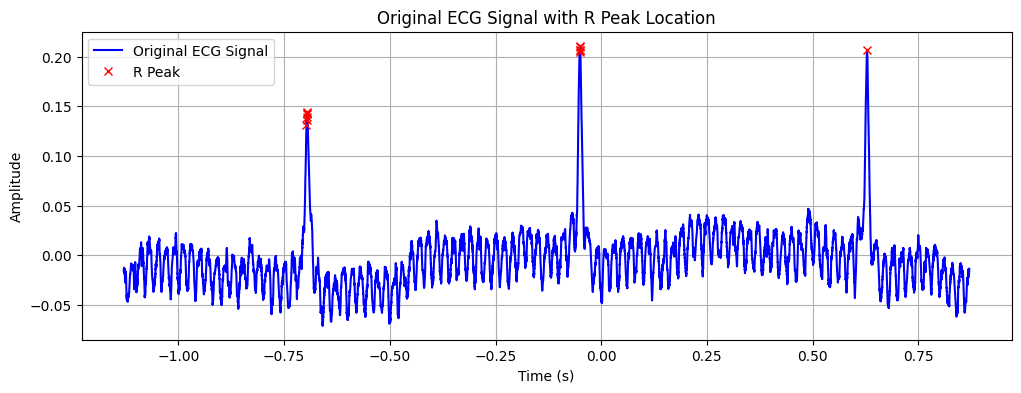

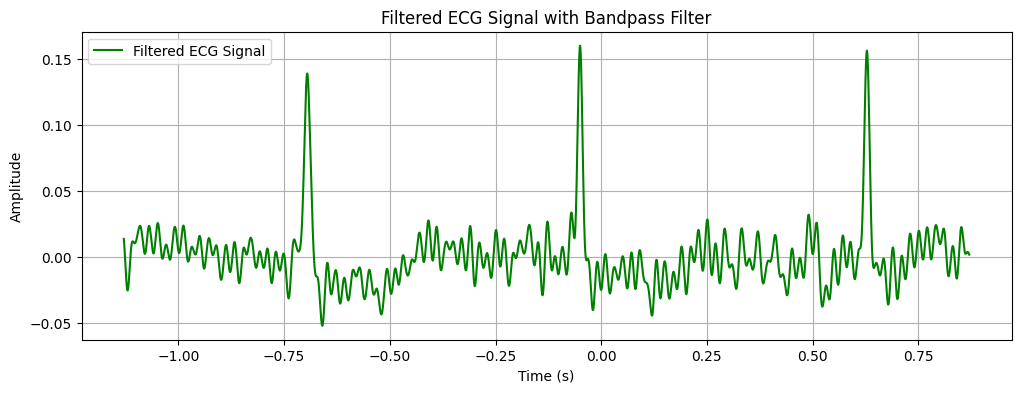

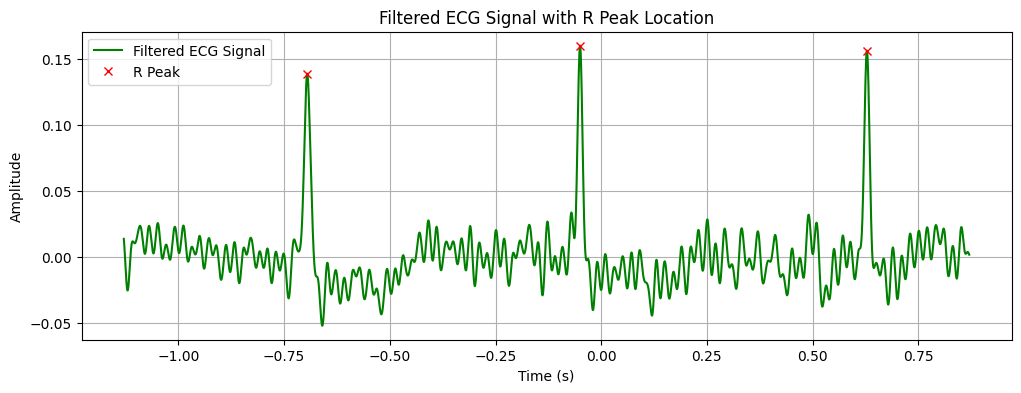

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

# Load the ECG signal (replace 'path_to_ecg_file.csv' with the actual file path)
# ecg_table = pd.read_csv("/home/nalin/Downloads/ecg(1).csv")
ecg_table = pd.read_csv("ecg(1).csv")

# Extract amplitude and time
ecg = ecg_table['Channel 1 (V)']
time = ecg_table['Time (s)']

# Define a function to add noise to the ECG signal
def add_noise(signal, noise_level):
    noisy_signal = signal + np.random.normal(0, noise_level, len(signal))
    return noisy_signal

# Define parameters
noise_level = 0.05  # Adjust as needed
low_cut_frequency = 0.5  # Adjust as needed
high_cut_frequency = 50.0  # Adjust as needed

# Plot original ECG signal
plt.figure(figsize=(12, 4))
plt.plot(time, ecg, label='Original ECG Signal', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original ECG Signal')
plt.legend()
plt.grid(True)
plt.show()

# Add noise to the ECG signal
noisy_ecg = add_noise(ecg, noise_level)

# Plot noisy ECG signal
plt.figure(figsize=(12, 4))
plt.plot(time, ecg, label='Original ECG Signal', color='blue', alpha=0.7)
plt.plot(time, noisy_ecg, label='Noisy ECG Signal', color='red', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original vs Noisy ECG Signal')
plt.legend()
plt.grid(True)
plt.show()

# Compute and show the location of the R peak in the original signal
peaks, _ = find_peaks(ecg, height=0.6 * np.max(ecg))

plt.figure(figsize=(12, 4))
plt.plot(time, ecg, label='Original ECG Signal', color='blue')
plt.plot(time[peaks], ecg[peaks], 'x', color='red', label='R Peak')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original ECG Signal with R Peak Location')
plt.legend()
plt.grid(True)
plt.show()

# Define a bandpass filter
def bandpass_filter(signal, low_cut, high_cut, fs):
    nyquist = 0.5 * fs
    low = low_cut / nyquist
    high = high_cut / nyquist
    b, a = butter(N=3, Wn=[low, high], btype='band')
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

# Apply the bandpass filter to the noisy ECG signal
Fs = 1 / (time[1] - time[0])  # Sampling frequency
filtered_ecg = bandpass_filter(noisy_ecg, low_cut_frequency, high_cut_frequency, Fs)

# Plot the filtered ECG signal
plt.figure(figsize=(12, 4))
plt.plot(time, filtered_ecg, label='Filtered ECG Signal', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered ECG Signal with Bandpass Filter')
plt.legend()
plt.grid(True)
plt.show()

# Compute and show the location of the R peak in the filtered signal
peaks_filtered, _ = find_peaks(filtered_ecg, height=0.6 * np.max(filtered_ecg))

plt.figure(figsize=(12, 4))
plt.plot(time, filtered_ecg, label='Filtered ECG Signal', color='green')
plt.plot(time[peaks_filtered], filtered_ecg[peaks_filtered], 'x', color='red', label='R Peak')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered ECG Signal with R Peak Location')
plt.legend()
plt.grid(True)
plt.show()
